In [1]:
%load_ext autoreload
%autoreload 2

In [22]:
import os
import shutil

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
%matplotlib notebook

import starfish
from starfish.types import Indices
from showit import image

In [3]:
experiment = starfish.Experiment.from_json('/Users/ambrosecarr/Desktop/MERFISH/experiment.json')

100%|██████████| 1/1 [00:00<00:00, 52.02it/s]


In [4]:
projection = experiment.image.max_proj(Indices.CH, Indices.ROUND, Indices.Z)

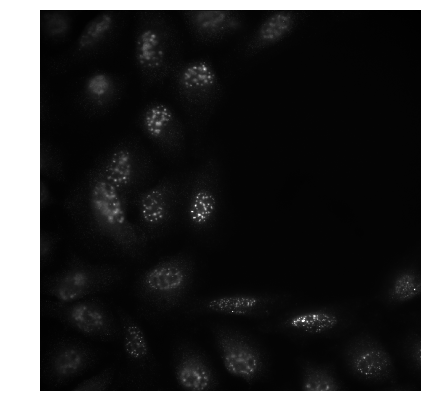

In [5]:
image(projection)

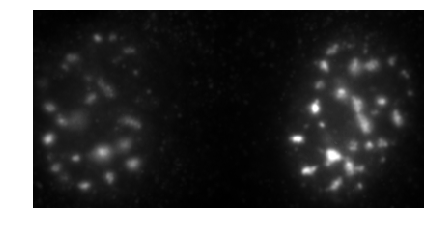

In [6]:
image(projection[950:1155, 545:950])

In [34]:
test_data = experiment.image._data[:, :, :, 950:1155, 545:950]

test_stack = starfish.ImageStack.from_numpy_array(test_data)
nuclei_stack = experiment.auxiliary_images['nuclei']._data[:, :, :, 950:1155, 545:950]
test_nuclei_stack = starfish.ImageStack.from_numpy_array(nuclei_stack)

100%|██████████| 1/1 [00:00<00:00, 2864.96it/s]


In [16]:
import json

def update_version_to_1_0_0(json_file: str):
    with open(json_file, 'rb') as frd:
        data = json.load(frd)
    data['version'] = '1.0.0'
    print(data)
    with open(json_file, 'w') as fwd:
        data = json.dump(data, fwd)

In [27]:
!mkdir -p /Users/ambrosecarr/Desktop/MERFISH_TEST/fov_001

In [28]:
merfish_test_stack = '/Users/ambrosecarr/Desktop/MERFISH_TEST/fov_001/hybridization.json'
test_stack.write(merfish_test_stack)

In [40]:
nuclei_test_stack = '/Users/ambrosecarr/Desktop/MERFISH_TEST/fov_001/nuclei.json'
test_nuclei_stack.write(nuclei_test_stack)

In [29]:
def create_experiment_json(new_directory, original_experiment, original_codebook):
    shutil.copy(original_experiment, new_directory)
    shutil.copy(original_codebook, new_directory)

In [30]:
create_experiment_json(
    os.path.split(merfish_test_stack)[0], 
    '/Users/ambrosecarr/Desktop/MERFISH/experiment.json',
    '/Users/ambrosecarr/Desktop/MERFISH/codebook.json'
)

In [37]:
test_experiment = starfish.Experiment.from_json('/Users/ambrosecarr/Desktop/MERFISH_TEST/experiment.json')

100%|██████████| 16/16 [00:00<00:00, 1424.91it/s]


<IPython.core.display.Javascript object>


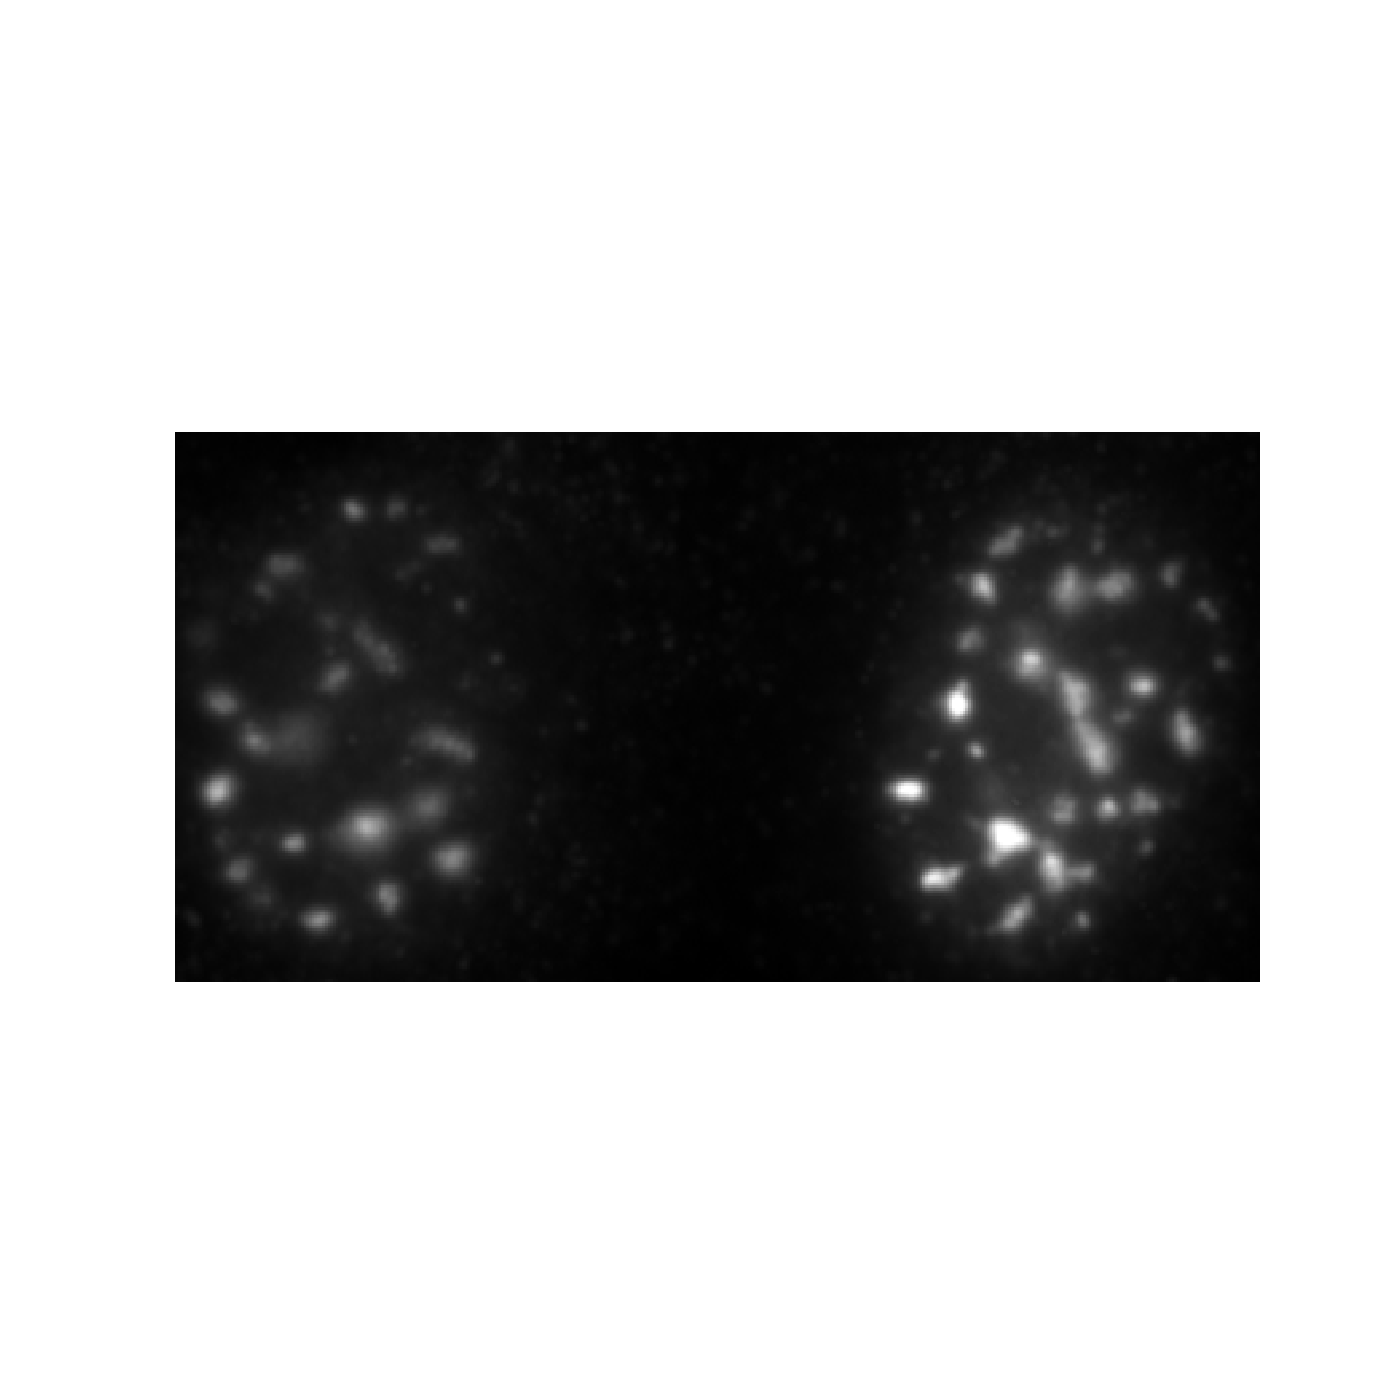

In [39]:
image(test_experiment.image.max_proj(Indices.CH, Indices.ROUND, Indices.Z))